# This is Heart Disease Prediction Project
We are going to predict based on the data wheather some have  the heart disease or not. 
1. Problem Defination
2. Data 
3. Evaluation 
4. Features 
5. Modeling 
6. Experimentation

# 1. Problem Defination 
> Based on given data we have to predict if a patient has heart disease or not.

# 2. Data 
> We have the data and have loaded it already

# 3. Evaluate 
> In initial stages we need to make sure , if our model gives us the accuracy of 95%

# 4. Features 
> What feasture are important , what features columns means what?

1. Age
2. Sex : male : 1
female : 0

3. chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

4. resting blood pressure (in mm Hg on admission to the hospital

5. serum cholestoral in mg/dl

6. (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment

--Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

12. vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

13. A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. Target : 0 No Heart disease
1 Heart disease

# 5. Modeling
### Tools Prepration

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# improting models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# import evaluation libraries 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score ,recall_score , f1_score
from sklearn.metrics import RocCurveDisplay
#The function plot_roc_curve has been deprecated and removed in the latest versions of scikit-learn (from version 1.2 onwards).

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [10]:
plt.style.use('seaborn-v0_8-darkgrid')

### Exploring Data Initial Stage
1. What problem i am going to solve ?
2. what kind of data i have ?
3. Dose this data have missing values ? 
4. Are there are Outliers , sporious vectors ? 
5. Can we add or remove Some of the features ? 

In [11]:
pd.set_option("display.max_columns",None) # will display all coulumns , not minimize

In [12]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')
df.shape

(1025, 14)

In [13]:
df. head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [14]:
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


In [15]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

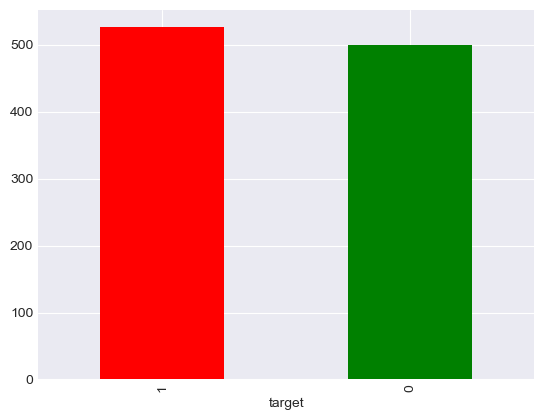

In [16]:
df['target'].value_counts().plot(kind='bar',color=['red','green'])
plt.show()

In [17]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [18]:
df.duplicated().sum() # duplicate values?

723

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()  #removed duplicate values

0

In [21]:
df.shape  #  current shape of data

(302, 14)

In [22]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [23]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000


### Encoding data

In [24]:
# encoding male and female into 1, 0 respectiverly
pd.get_dummies(df['sex'])        # One-hot encoding
df['sex'] = df['sex'].map({'Male':1, 'Female':0})

In [25]:
# encoding chest_pain_type
pd.get_dummies(df['chest_pain_type'])        # One-hot encoding
df['chest_pain_type'] = df['chest_pain_type'].map({'Non-anginal pain': 0 ,'Typical angina':1, 'Atypical angina':2,'Asymptomatic':3})

In [26]:
# encoding fasting_blood_sugar	
pd.get_dummies(df['fasting_blood_sugar'])        # One-hot encoding
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({'Lower than 120 mg/ml': 0 ,'Greater than 120 mg/ml':1})

In [27]:
# encoding rest_ecg
pd.get_dummies(df['rest_ecg'])        # One-hot encoding
df['rest_ecg'] = df['rest_ecg'].map({'Normal': 0 ,'ST-T wave abnormality':1, 'Left ventricular hypertrophy':2})

In [28]:
# encoding exercise_induced_angina	
pd.get_dummies(df['exercise_induced_angina'])        # One-hot encoding
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({'No': 0 ,'Yes':1})

In [29]:
# encoding slope	
pd.get_dummies(df['slope'])        # One-hot encoding
df['slope'] = df['slope'].map({'Downsloping': 0 ,'Flat':1,'Upsloping':2})

In [30]:
# encoding vessels_colored_by_flourosopy	
pd.get_dummies(df['vessels_colored_by_flourosopy'])        # One-hot encoding
df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].map({'Zero': 0 ,'One':1,'Two':2 ,'Three':3 ,'Four':4})

In [31]:
# encoding thalassemia	
pd.get_dummies(df['thalassemia'])        # One-hot encoding
df['thalassemia'] = df['thalassemia'].map({'No': 0 ,'Normal':1,'Reversable Defect':2 ,'Fixed Defect':3})

#### Column Discription after encoding: 
1. sex -> {'Male':1, 'Female':0}
2. chest_pain_type -> {'Non-anginal pain': 0 ,'Typical angina':1, 'Atypical angina':2,'Asymptomatic':3}
3. fasting_blood_sugar -> {'Lower than 120 mg/ml': 0 ,'Greater than 120 mg/ml':1} 
4. rest_ecg -> {'Normal': 0 ,'ST-T wave abnormality':1, 'Left ventricular hypertrophy':2} 
5. exercise_induced_angina -> {'No': 0 ,'Yes':1}
6. slope -> {'Downsloping': 0 ,'Flat':1,'Upsloping':2} 
7. vessels_colored_by_flourosopy -> {'Zero': 0 ,'One':1,'Two':2 ,'Three':3 ,'Four':4} 
8. thalassemia -> {'No': 0 ,'Normal':1,'Reversable Defect':2 ,'Fixed Defect':3} 

In [32]:
df.dtypes

age                                int64
sex                                int64
chest_pain_type                    int64
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar                int64
rest_ecg                           int64
Max_heart_rate                     int64
exercise_induced_angina            int64
oldpeak                          float64
slope                              int64
vessels_colored_by_flourosopy      int64
thalassemia                        int64
target                             int64
dtype: object

In [33]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,125,212,0,1,168,0,1.0,0,2,2,0
1,53,1,1,140,203,1,0,155,1,3.1,2,0,2,0
2,70,1,1,145,174,0,1,125,1,2.6,2,0,2,0
3,61,1,1,148,203,0,1,161,0,0.0,0,1,2,0
4,62,0,1,138,294,1,1,106,0,1.9,1,3,3,0


In [34]:
df.to_csv("HeartDiseaseClean.csv",index=False) # saving the clean encoded data

In [35]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [36]:
len(df)

302

In [37]:
206/302*100  # male percent

68.21192052980133

In [38]:
96/302*100 # female percent

31.788079470198678

In [39]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,92


In [40]:
72/96, 93/206  # percent calculate

(0.75, 0.45145631067961167)

#### Discription:
1. Female : 72 out of 96 have disease  75 % of females have disease
2. male   : 92 out of 206 have disesase 45 % of males have disease
##### Means females have greater ratio of disease then males

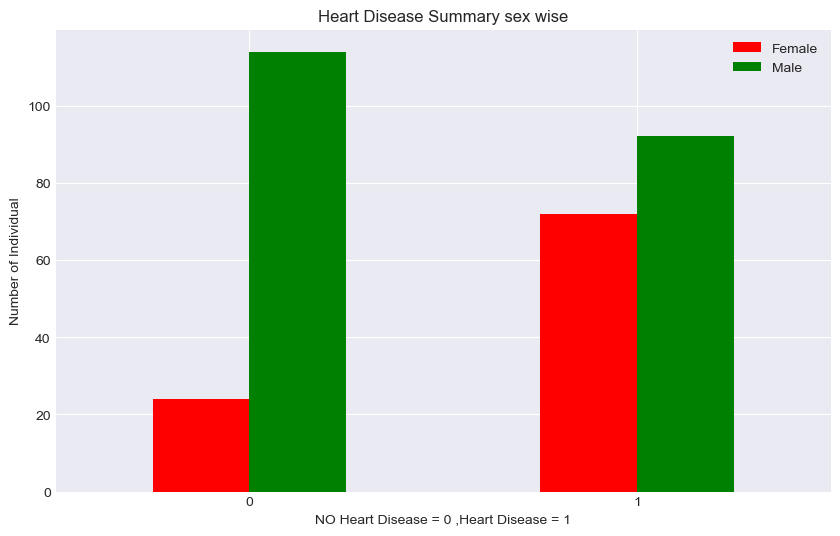

In [41]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',figsize=(10,6),color=['red','green'])
plt.title('Heart Disease Summary sex wise')
plt.xlabel("NO Heart Disease = 0 ,Heart Disease = 1")
plt.ylabel("Number of Individual")
plt.legend(["Female","Male"])
plt.xticks(rotation= 0)
plt.show()

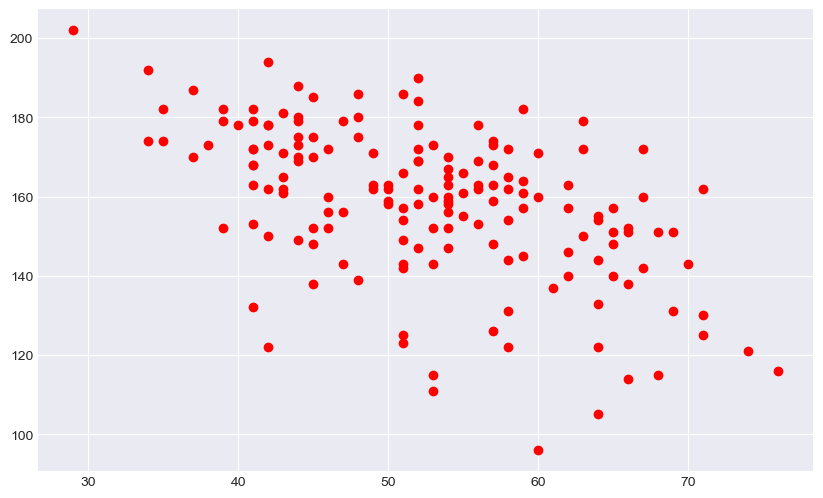

In [42]:
# finding pattern using scater plot
plt.figure(figsize=(10,6))
plt.scatter(df.age[df['target']==1],df.Max_heart_rate[df['target']==1], c= 'red',)
plt.show()

#### Discription 
As the age increases the heart rate descreases negitive linear

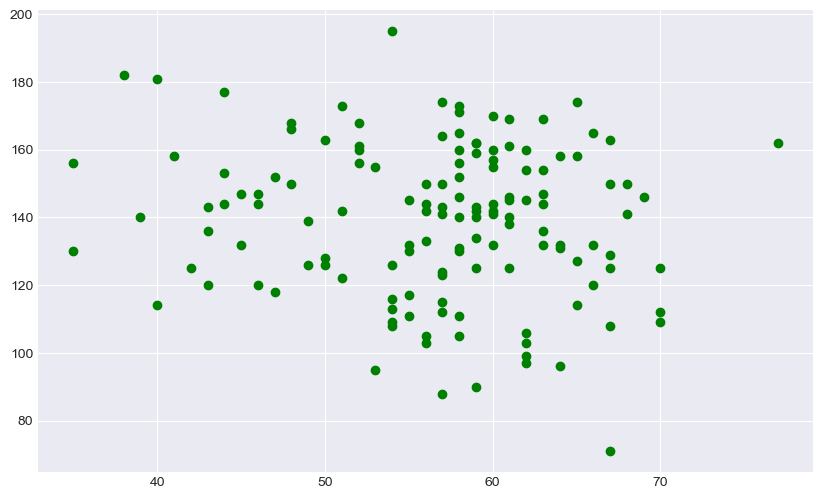

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df['target']==0],df.Max_heart_rate[df['target']==0], c= 'green',)
plt.show()

#### Discription : 
No pattern is visible , spreaded plots

### Common Graph

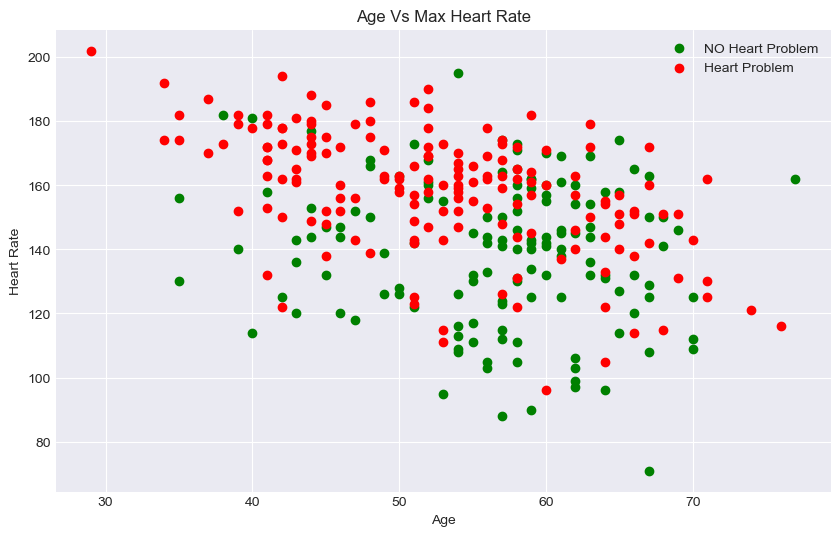

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df['target']==0],df.Max_heart_rate[df['target']==0], c= 'green',)
plt.scatter(df.age[df['target']==1],df.Max_heart_rate[df['target']==1], c= 'red',)
plt.title("Age Vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["NO Heart Problem","Heart Problem"])
plt.show()

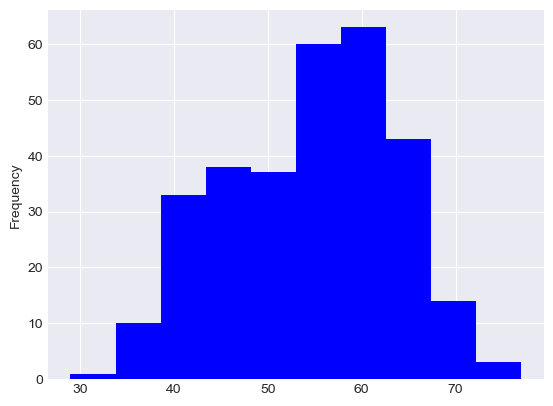

In [45]:
# creating Histogram to see heart distribution
df.age.plot(kind="hist", color = "blue")
plt.show()

In [46]:
df['chest_pain_type'].value_counts()

chest_pain_type
1    143
0     86
2     50
3     23
Name: count, dtype: int64

In [47]:
pd.crosstab(df['chest_pain_type'],df['target'])

target,0,1
chest_pain_type,,
0,18,68
1,104,39
2,9,41
3,7,16


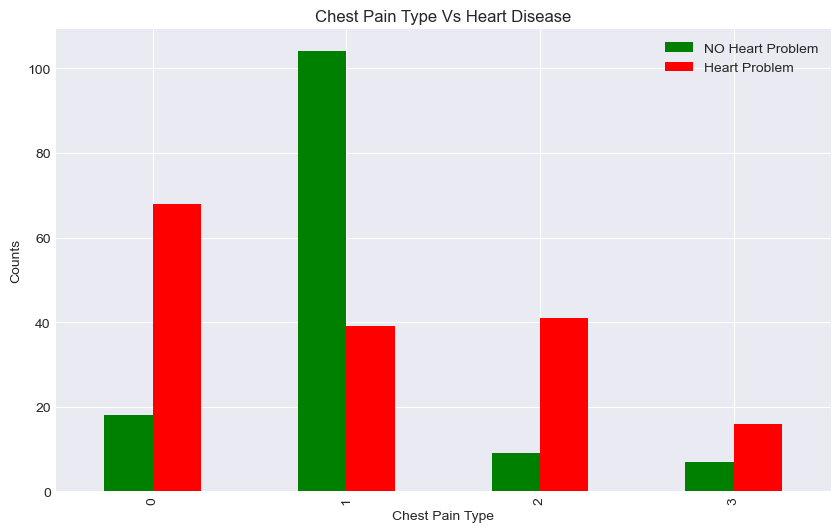

In [48]:
# bar chart Chest pain type vs target
pd.crosstab(df['chest_pain_type'],df['target']).plot(kind= 'bar',
                                                    figsize=(10,6),
                                                    color= ["green","red"])
plt.title('Chest Pain Type Vs Heart Disease')
plt.xlabel("Chest Pain Type")
plt.ylabel("Counts")
plt.legend(["NO Heart Problem","Heart Problem"])
plt.show()

### Corelation Matrix

In [49]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,125,212,0,1,168,0,1.0,0,2,2,0
1,53,1,1,140,203,1,0,155,1,3.1,2,0,2,0
2,70,1,1,145,174,0,1,125,1,2.6,2,0,2,0
3,61,1,1,148,203,0,1,161,0,0.0,0,1,2,0
4,62,0,1,138,294,1,1,106,0,1.9,1,3,3,0


In [50]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
age,1.000000,-0.094962,-0.010219,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,0.164124,0.302261,-0.121134,-0.221476
sex,-0.094962,1.000000,0.099744,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,0.032990,0.113060,-0.339927,-0.283609
chest_pain_type,-0.010219,0.099744,1.000000,0.082426,-0.022070,-0.037378,-0.052758,0.072436,-0.018508,-0.000100,0.006034,-0.042442,-0.016325,-0.003296
resting_blood_pressure,0.283121,-0.057647,0.082426,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,0.122873,0.099248,-0.134829,-0.146269
cholestoral,0.207216,-0.195571,-0.022070,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,-0.000417,0.086878,0.049500,-0.081437
fasting_blood_sugar,0.119492,0.046022,-0.037378,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,0.058654,0.144935,-0.120910,-0.026826
rest_ecg,-0.111590,-0.060351,-0.052758,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,-0.090402,-0.083112,0.026762,0.134874
Max_heart_rate,-0.395235,-0.046439,0.072436,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,-0.384754,-0.228311,0.299756,0.419955
exercise_induced_angina,0.093216,0.143460,-0.018508,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,0.256106,0.125377,-0.285693,-0.435601
oldpeak,0.206040,0.098322,-0.000100,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,0.576314,0.236560,-0.291657,-0.429146


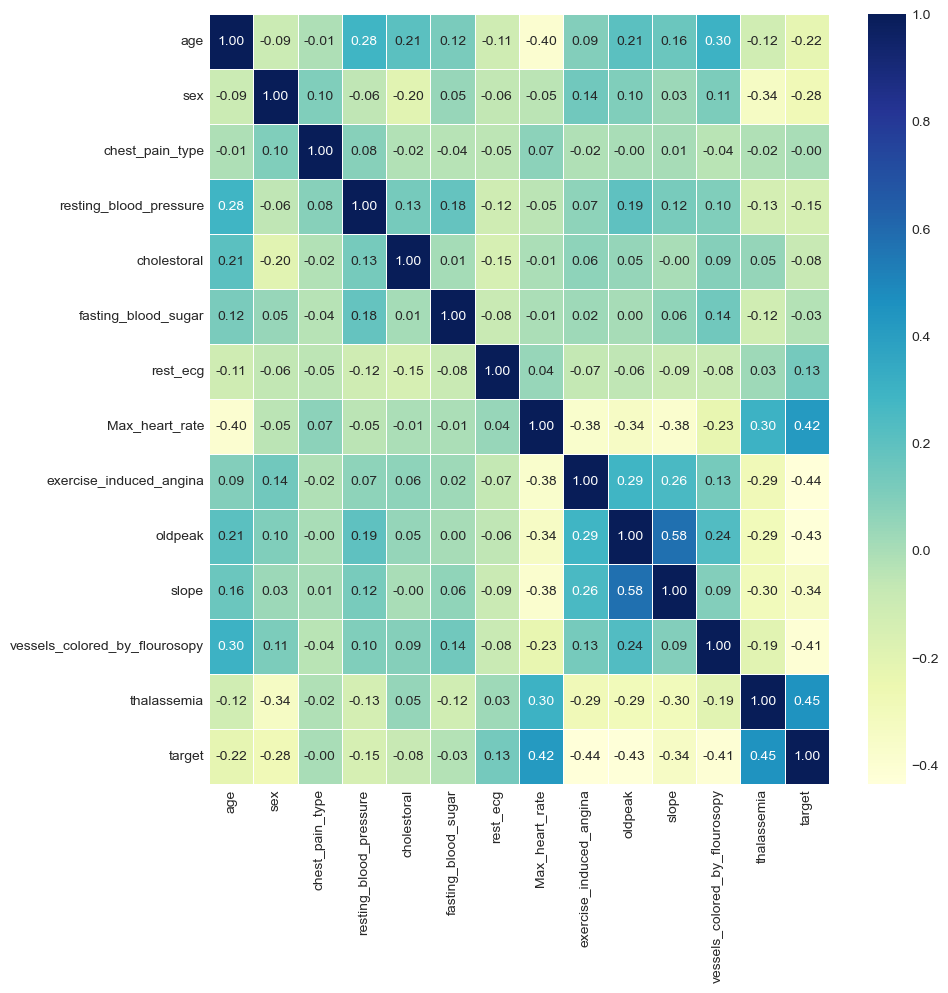

In [51]:
# lets draw correlation map 
corr_map = df.corr()

fig , ax = plt.subplots(figsize= (10,10))
ax = sns.heatmap(corr_map, annot=True, linewidths= 0.5,fmt= "0.2f",cmap="YlGnBu")
plt.show()

In [52]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,125,212,0,1,168,0,1.0,0,2,2,0
1,53,1,1,140,203,1,0,155,1,3.1,2,0,2,0
2,70,1,1,145,174,0,1,125,1,2.6,2,0,2,0
3,61,1,1,148,203,0,1,161,0,0.0,0,1,2,0
4,62,0,1,138,294,1,1,106,0,1.9,1,3,3,0


In [53]:
# splitting data
X = df.drop("target",axis=1)
y = df['target']

In [54]:
# using Random seed so that everyone get similare results
np.random.seed(7)
# split into test and train Data
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.2)

In [55]:
len(X)

302

In [56]:
len(X_train)

241

In [57]:
241/302

0.7980132450331126

#### The models we are going to use
1. K-Nearest Neighbour Classifier
2. RandomForestClassifier
3. Logistic Regression

In [58]:
# putting models to dictionary
models = {"KNN" : KNeighborsClassifier(),
        "RFC" : RandomForestClassifier(), 
        "LR" : LogisticRegression()}

# create function to evaluate  the model
def fit_and_score(model,X_train,X_test,y_train,y_test):
    np.random.seed()
    # make a dictionary to save the score of model
    model_score = {}
    # looping through
    for name,model in models.items():
        model.fit(X_train,y_train)
        # Evaluate the score and append it 
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [59]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
model_scores

{'KNN': 0.7377049180327869, 'RFC': 0.8360655737704918, 'LR': 0.819672131147541}

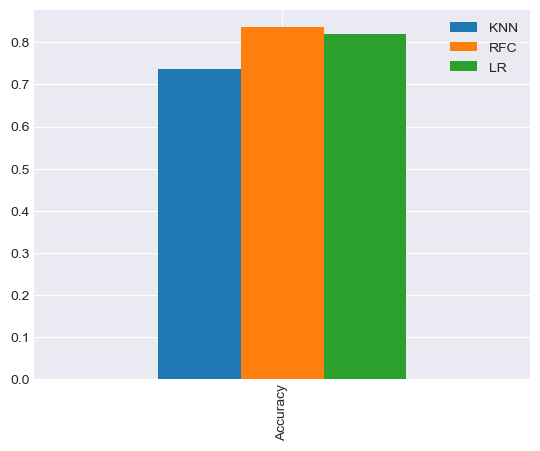

In [61]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.plot.bar()
plt.show()

# Improving  and tuning the model
Universal Method used fro all Classification Problems:
1. Hyperparameters Tuning 
2. Improving Features
   
> Advance features

3. Confusion Matrix 
4. Cross Validation
5. Precision
6. Recall 
7. F1
8. clasification Report
9. ROC curve

### Hyperparameters Tuning
### Improving Features

In [62]:
#
train_score = []
test_score = []
#create range to be test for n_estimator
nneighbours = range(1,30)
# KNN instance
KNN = KNeighborsClassifier()
# looping through the range 
for i in nneighbours:
    KNN.set_params(n_neighbors= i)
    # Run the fit for ith value
    KNN.fit(X_train,y_train)
    # update the trainig score 
    train_score.append(KNN.score(X_train,y_train))
    # update test score
    test_score.append(KNN.score(X_test,y_test))

In [63]:
train_score 

[1.0,
 0.7925311203319502,
 0.7634854771784232,
 0.7427385892116183,
 0.7676348547717843,
 0.7551867219917012,
 0.7551867219917012,
 0.7178423236514523,
 0.7095435684647303,
 0.7012448132780082,
 0.6846473029045643,
 0.6887966804979253,
 0.6970954356846473,
 0.7012448132780082,
 0.6721991701244814,
 0.6929460580912863,
 0.6763485477178424,
 0.6846473029045643,
 0.6721991701244814,
 0.6929460580912863,
 0.6929460580912863,
 0.6846473029045643,
 0.6846473029045643,
 0.6846473029045643,
 0.6804979253112033,
 0.6680497925311203,
 0.6929460580912863,
 0.6887966804979253,
 0.6680497925311203]

In [64]:
 test_score

[0.5737704918032787,
 0.5901639344262295,
 0.6721311475409836,
 0.7049180327868853,
 0.7377049180327869,
 0.7868852459016393,
 0.6885245901639344,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.6721311475409836,
 0.7049180327868853,
 0.7213114754098361,
 0.6885245901639344,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869]

### plot the accuracy 

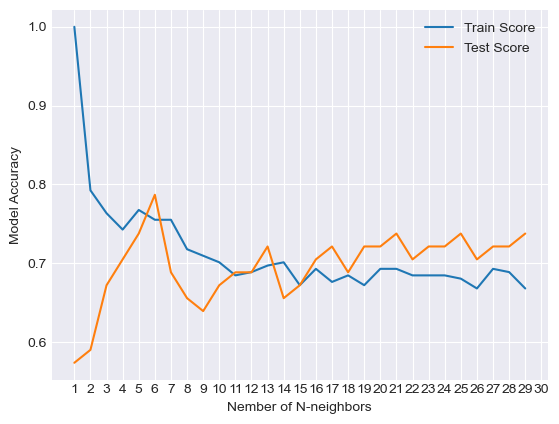

max Knn score = 78.69%


In [65]:
plt.plot(nneighbours,train_score,label = "Train Score")
plt.plot(nneighbours,test_score,label= 'Test Score')
plt.xticks(np.arange(1,31,1))
plt.xlabel("Nember of N-neighbors")
plt.ylabel("Model Accuracy")
plt.legend()
plt.show()
print(f'max Knn score = {np.max(test_score)*100:0.2f}%')

# Discription : 
The KNN fails and moving to next models

### Hyper Parameters tuning using Randomized search CV
1. LogisticRegressor()
2. RandomForestClassifier()

In [66]:
LR_hp = {"solver" : np.logspace(-4,4,20), 
'solver': ['liblinear', 'lbfgs']}

In [67]:
RFC_hp = {'n_estimators': np.arange(10,1600,100),
'max_depth' : [None , 3,5,6,10] ,
'min_samples_split' : np.arange(2,20,2),
'min_samples_leaf': np.arange(1,20,2)} 

In [68]:
#tune logistic Regression
np.random.seed(7)
#lets use RSCV to tune HP
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp, 
                       cv= 5 , 
                       n_iter= 20 , 
                       verbose=True)
# fit the random hyper parameters 
lr.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [69]:
lr.score(X_test,y_test)

0.819672131147541

In [70]:
lr.best_params_

{'solver': 'liblinear'}

In [71]:
#tune logistic Regression
np.random.seed(7)
#lets use RSCV to tune HP
rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp, 
                       cv= 5 , 
                       n_iter= 20 , 
                       verbose=True)
# fit the random hyper parameters 
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [74]:
rfc.score(X_test,y_test)

0.8360655737704918

In [75]:
rfc.best_params_

{'n_estimators': 1010,
 'min_samples_split': 10,
 'min_samples_leaf': 13,
 'max_depth': 10}

1. By Hand Hyper parameters Tuning  # done it beem tere seen it all 
2. Randomized Search CV # Done it been there , Seen it all  
3. GridSearch CV #lets try this one 

In [76]:
# hyper parameters  tuning using Grid Search cv

#tune logistic Regression
np.random.seed(7)
#lets use RSCV to tune HP
lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp, 
                       cv= 5 , 
                       verbose=True)
# fit the random hyper parameters 
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'solver': ['liblinear', 'lbfgs']}, verbose=True)

In [77]:
lr_gs.score(X_test,y_test)

0.819672131147541

In [78]:
lr_gs.best_params_

{'solver': 'liblinear'}

In [79]:
RFC_hp = {
    'n_estimators': [50, 100, 200],   # small number of trees
    'max_depth': [None, 3, 5, 7],     # fewer depth choices
    'min_samples_split': [2, 5, 10],  # fewer splits
    'min_samples_leaf': [1, 3, 5]     # fewer leaf sizes
}

In [80]:
#tune RandomForestClassifier 
np.random.seed(7)
#lets use RSCV to tune HP
rfc_gs = GridSearchCV(RandomForestClassifier(),
                       param_grid=RFC_hp, 
                       cv= 5 , 
                       verbose=True)
# fit the random hyper parameters 
rfc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=True)

In [81]:
print(rfc_gs.score(X_test,y_test))

0.819672131147541


In [82]:
rfc_gs.best_params_

{'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

# Improving  and tuning the model
Universal Method used fro all Classification Problems:
1. Hyperparameters Tuning 
2. Improving Features
   
> Advance features

3. Confusion Matrix
4. ROC curve
5. Cross Validation
6. Precision
7. Recall 
8. F1
9. clasification Report
  

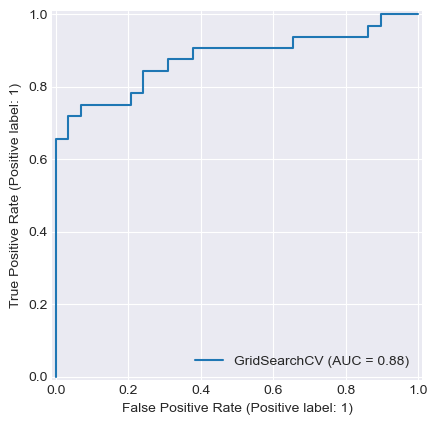

In [83]:
# ploting reoc curve
y_preds = lr_gs.predict(X_test)
RocCurveDisplay.from_estimator(lr_gs,X_test,y_test)
plt.show()

In [84]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[26  3]
 [ 8 24]]


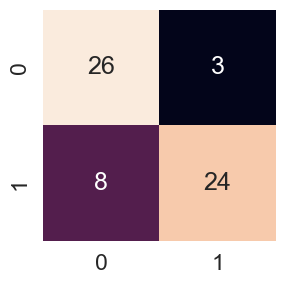

In [85]:
sns.set(font_scale=1.5)

def plot_confusion(y_test, y_preds):
    '''This plots the confusion matrix.'''
    fig, ax = plt.subplots(figsize=(3, 3))   # Correct parentheses
    sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                fmt='d',         # Show as integers
                cbar=False,
                ax=ax)
    plt.show()

plot_confusion(y_test, y_preds)

In [86]:
# plot classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [87]:
lr_gs.best_params_
lr = LogisticRegression(solver='liblinear')

In [88]:
# Cross Validation Accuracy 
cv_accuracy = cross_val_score(lr,X,y,cv=7,scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)

In [89]:
cv_accuracy

0.7980217456961641

In [90]:
# Cross Validation precision 
cv_precision = cross_val_score(lr,X,y,cv=7,scoring="precision")
cv_precision = np.mean(cv_precision)

In [91]:
# Cross Validation precision 
cv_recall = cross_val_score(lr,X,y,cv=7,scoring="recall")
cv_recall = np.mean(cv_recall)

In [92]:
# Cross Validation precision 
cv_f1 = cross_val_score(lr,X,y,cv=7,scoring="f1")
cv_f1 = np.mean(cv_f1)

In [93]:
cv_accuracy,cv_precision,cv_recall,cv_f1

(0.7980217456961641,
 0.8097433966999183,
 0.8240165631469979,
 0.8153724246405315)

### Visualizing the Cross validatrion matrics

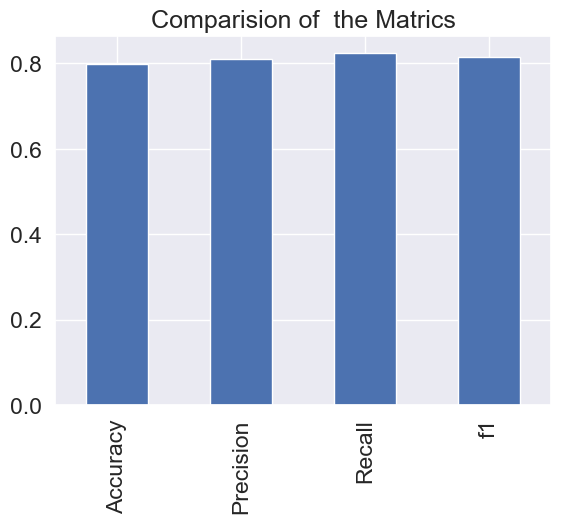

In [94]:
cv_plot = pd.DataFrame({'Accuracy' : cv_accuracy ,
                       'Precision' : cv_precision,  
                       'Recall' : cv_recall ,
                       'f1' : cv_f1} , index=[0])
cv_plot.T.plot.bar(title='Comparision of  the Matrics',
                legend=False)
plt.show()

# Feature Improvement

In [95]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,125,212,0,1,168,0,1.0,0,2,2,0
1,53,1,1,140,203,1,0,155,1,3.1,2,0,2,0
2,70,1,1,145,174,0,1,125,1,2.6,2,0,2,0
3,61,1,1,148,203,0,1,161,0,0.0,0,1,2,0
4,62,0,1,138,294,1,1,106,0,1.9,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,0,120,211,0,0,115,0,1.5,1,0,3,1
733,44,0,0,108,141,0,1,175,0,0.6,1,0,3,1
739,52,1,1,128,255,0,1,161,1,0.0,0,1,2,0
843,59,1,3,160,273,0,0,125,0,0.0,0,0,3,0


In [96]:
# check coficient
lr.fit(X_train,y_train)
lr.coef_

array([[ 0.00508492, -1.07674221, -0.18059798, -0.01244342, -0.00556049,
         0.28580786,  0.32173813,  0.01952037, -0.88440831, -0.38147118,
        -0.68311015, -0.92228935,  0.83646977]])

In [97]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': 0.005084919569253272,
 'sex': -1.0767422074268493,
 'chest_pain_type': -0.18059797748583434,
 'resting_blood_pressure': -0.012443419228444247,
 'cholestoral': -0.005560493309006786,
 'fasting_blood_sugar': 0.28580785953824717,
 'rest_ecg': 0.3217381258017849,
 'Max_heart_rate': 0.01952037069923762,
 'exercise_induced_angina': -0.8844083147867051,
 'oldpeak': -0.3814711761716433,
 'slope': -0.6831101530243628,
 'vessels_colored_by_flourosopy': -0.9222893504298838,
 'thalassemia': 0.8364697723360641}

In [98]:
features = pd.DataFrame(final_coef,index= [0])
features.T.plot.bar(title= Feature importance , legend= False)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3093358697.py, line 2)

In [ ]:
# Conclusion 
* We set accuracy goal 95% goal but we didnt meat
* What if we try to get more data 
* What if wet try to improve the quality of the data 
* what if we try to use other models and see if there is any improvement